In [59]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  

In [60]:
merged  = X.join(y).copy()
merged.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [29]:
print('Gender',set(merged['Gender']))
print('family_history_with_overweight',set(merged['family_history_with_overweight']))
print('FAVC',set(merged['FAVC']))
print('CAEC',set(merged['CAEC']))
print('SMOKE',set(merged['SMOKE']))
print('SCC',set(merged['SCC']))
print('CALC',set(merged['CALC']))
print('MTRANS',set(merged['MTRANS']))
print('NObeyesdad',set(merged['NObeyesdad']))



Gender {'Male', 'Female'}
family_history_with_overweight {'yes', 'no'}
FAVC {'yes', 'no'}
CAEC {'Sometimes', 'Frequently', 'Always', 'no'}
SMOKE {'yes', 'no'}
SCC {'yes', 'no'}
CALC {'Sometimes', 'Frequently', 'Always', 'no'}
MTRANS {'Automobile', 'Bike', 'Walking', 'Public_Transportation', 'Motorbike'}
NObeyesdad {'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I', 'Insufficient_Weight'}


In [30]:
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Male': 1, 'Female': 0, 'yes': 1, 'no': 0}

for col in binary_columns:
    merged[col] = merged[col].map(binary_mapping)

In [31]:
ordinal_columns = ['CAEC', 'CALC']
ordinal_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

for col in ordinal_columns:
    merged[col] = merged[col].map(ordinal_mapping)

In [32]:
nobeyesdad_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

merged['NObeyesdad'] = merged['NObeyesdad'].map(nobeyesdad_mapping)

In [45]:
nominal_columns = ['MTRANS']
merge_encoded = pd.get_dummies(merged, columns=nominal_columns, drop_first=True)
merge_encoded = merge_encoded[['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'NObeyesdad']]


In [46]:

merge_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,False,False,True,False,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,False,False,True,False,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,False,False,True,False,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,False,False,False,True,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,False,False,True,False,3


<Figure size 3000x3000 with 0 Axes>

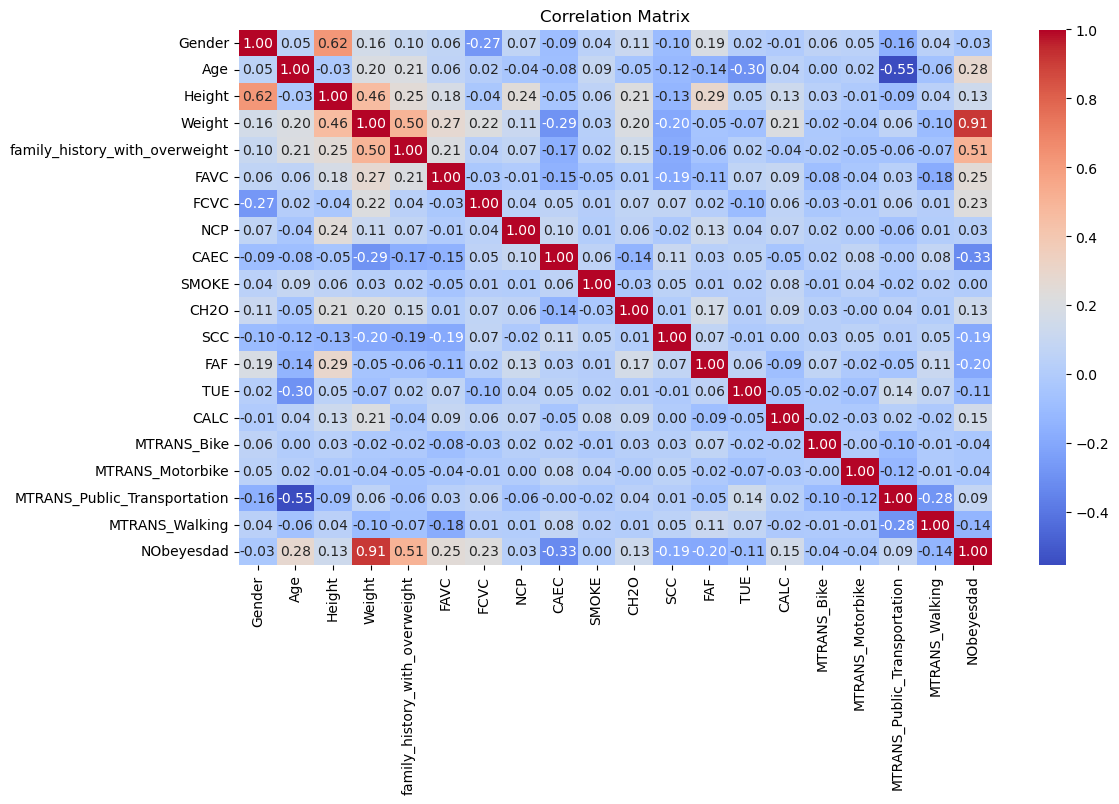

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt



corr_matrix = merge_encoded.corr()

plt.figure(figsize=(30, 30))

scorrelation_matrix = merge_encoded.corr()

# 2. Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(scorrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()



In [83]:
merge_2  = merged.copy()


binary_columns = ['Gender', 'family_history_with_overweight']
binary_mapping = {'Male': 1, 'Female': 0, 'yes': 1, 'no': 0}

for col in binary_columns:
    merge_2[col] = merge_2[col].map(binary_mapping)


merge_2.groupby('NObeyesdad').agg(
    Size  = ('NObeyesdad', 'size'),
    Age_mean = ('Age', 'mean'),
    weight_mean = ('Weight', 'mean'),
    height_mean = ('Height', 'mean'),
    over_history = ('family_history_with_overweight', 'mean'),
    male_percentage = ('Gender','mean')

)



,Size,Age_mean,weight_mean,height_mean,over_history,male_percentage
NObeyesdad,,,,,,
Insufficient_Weight,272,19.783237,49.906330,1.691117,0.463235,0.363971
Normal_Weight,287,21.738676,62.155052,1.676585,0.540070,0.508711
Obesity_Type_I,351,25.884941,92.870198,1.693804,0.980057,0.555556
Obesity_Type_II,297,28.233785,115.305311,1.771795,0.996633,0.993266
Obesity_Type_III,324,23.495554,120.941114,1.687559,1.000000,0.003086
Overweight_Level_I,290,23.417674,74.266828,1.687836,0.720690,0.500000
Overweight_Level_II,290,26.996981,82.085271,1.703748,0.937931,0.644828


In [88]:
merge_2[merge_2[]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
